# Cluster Free Text Comments

In [ ]:
import sys

sys.path.insert(0, "../../../src")

# 02_cluster_comments.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_survey_toolkit import nlp
from pandas_survey_toolkit.vis import cluster_heatmap_plot

# Create sample survey data with open-ended comments about a product
data = {
    'respondent_id': range(1, 21),
    'comments': [
        "Battery life is excellent, lasts all day",
        "The battery doesn't last long enough for me",
        "Battery performance is outstanding, very impressed",
        "Screen resolution is incredible, so sharp and clear",
        "Love the high-resolution display, colors are vibrant",
        "The screen is too reflective in bright light",
        "Camera quality is excellent for the price range",
        "Photos taken in low light are grainy and poor quality",
        "Camera autofocus is slow and often misses the shot",
        "The software is intuitive and easy to use",
        "User interface is confusing and not user-friendly",
        "Software keeps crashing when I open multiple apps",
        "Build quality feels premium and solid",
        "The device feels flimsy and cheaply made",
        "Very durable, survived several drops without damage",
        "Excellent value for money considering the features",
        "Overpriced for what you get compared to competitors",
        "Worth every penny, exceeded my expectations",
        "Customer service was unhelpful when I had issues",
        "Great customer support, quick and helpful responses"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the original data
print("Original data:")
display(df)


Original data:


,respondent_id,comments
0,1,"Battery life is excellent, lasts all day"
1,2,The battery doesn't last long enough for me
2,3,"Battery performance is outstanding, very impre..."
3,4,"Screen resolution is incredible, so sharp and ..."
4,5,"Love the high-resolution display, colors are v..."
5,6,The screen is too reflective in bright light
6,7,Camera quality is excellent for the price range
7,8,Photos taken in low light are grainy and poor ...
8,9,Camera autofocus is slow and often misses the ...
9,10,The software is intuitive and easy to use



Comment clusters:


,comments,cluster,cluster_probability
11,Software keeps crashing when I open multiple apps,-1.0,0.000000
0,"Battery life is excellent, lasts all day",0.0,1.000000
1,The battery doesn't last long enough for me,0.0,1.000000
2,"Battery performance is outstanding, very impre...",0.0,1.000000
10,User interface is confusing and not user-friendly,1.0,0.691647
18,Customer service was unhelpful when I had issues,1.0,0.662440
8,Camera autofocus is slow and often misses the ...,1.0,0.702883
9,The software is intuitive and easy to use,1.0,0.691647
6,Camera quality is excellent for the price range,1.0,0.738161
5,The screen is too reflective in bright light,1.0,1.000000



Comments per cluster:


,cluster,count
0,1.0,10
1,2.0,6
2,0.0,3
3,-1.0,1


In [ ]:

# Cluster the comments
df_clustered = df.cluster_comments(input_column='comments', min_cluster_size=3, n_neighbors=5, cluster_selection_epsilon=0.5)

# Examine the clusters
print("\nComment clusters:")
display(df_clustered[['comments', 'cluster', 'cluster_probability']].sort_values('cluster'))

# Count comments per cluster
cluster_counts = df_clustered['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']
print("\nComments per cluster:")
display(cluster_counts)

In [24]:
df_clustered.head()

,respondent_id,comments,sentence_embedding,umap_x,umap_y,cluster,cluster_probability
0,1,"Battery life is excellent, lasts all day","[-0.038631026, 0.044625234, -0.028667396, -0.0...",8.401911,11.336739,0.0,1.000000
1,2,The battery doesn't last long enough for me,"[-0.0007719228, -0.0042446144, 0.011075384, -0...",8.528222,10.872844,0.0,1.000000
2,3,"Battery performance is outstanding, very impre...","[-0.008022247, 0.09049879, -0.0867905, -0.0022...",7.943828,11.140040,0.0,1.000000
3,4,"Screen resolution is incredible, so sharp and ...","[-0.014808243, -0.03135826, 0.035538964, -0.05...",6.189346,9.061983,1.0,1.000000
4,5,"Love the high-resolution display, colors are v...","[-0.029058423, 0.026945723, 0.040125024, -0.05...",5.850636,9.783623,1.0,0.828816


You can see on the datamapplot that similar comments are closer together. By varying the cluster_epsilon you can tweak the number of clusters (clustering works better on much larger datasets)

<InteractiveFigure width=100% height=800>
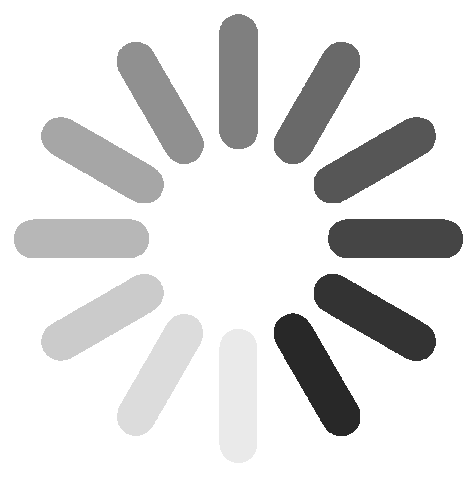

In [28]:
import datamapplot

datamapplot.create_interactive_plot(df_clustered[['umap_x', 'umap_y']].values, df_clustered['cluster'].astype(str).values, hover_text=df_clustered['comments'])